# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 6: PCA and t-SNE

## Learning Objectives

At the end of the experiment, you will be able to

* understand terms like projection and manifold learning
* know different dimensionality reduction techniques
* perform principal component analysis (PCA) on MNIST dataset
* perform Kernel PCA on Swiss Roll dataset
* know and implement t-SNE algorithm

## Information

Many machine learning problems involve a vast number of features for each training instance, making the training extremely slow and harder to find a good solution. This problem is called the **curse of dimensionality**. Therefore, we need dimensionality reduction techniques, that transform data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains most meaningful properties of the original data. Dimensionality reduction speeds up training and is also extremely useful for data visualization. Two main approaches to reducing dimensionality are: **projection** and **manifold learning**.

#### Projection

In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within a much lower-dimensional subspace of the high-dimensional space.

In the figure below a 3D dataset is represented by circles.

<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/pca1.png" width=450px/>
</center>

$\hspace{8.6cm} \text{A 3D dataset lying close to a 2D subspace}$
<br><br>

Notice that all training instances lie close to a plane which is a lower-dimensional (2D) subspace of the high-dimensional (3D) space. 

After projecting every training instance perpendicularly onto this subspace, we get the new 2D dataset as shown in the figure below. By that, we reduced the dataset’s dimensionality from 3D to 2D.

<br><br>
<center>
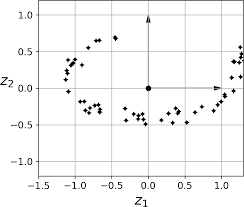
</center>

$\hspace{10cm} \text{The new 2D dataset after projection}$
<br><br>

The most common dimensionality reduction method, that applies projection is:

* PCA (Principal Component Analysis)

However, projection is not always the best approach to dimensionality reduction. In many cases, the subspace may twist and turn, such as in the 
Swiss roll toy dataset represented in the figure below.
<br><br>
<center>
<img src="https://cdn-images-1.medium.com/max/1024/1*4HkBjs6YhR18fl9ETBhfzw.png" width=450px/>
</center>

$\hspace{10cm} \text{Swiss roll dataset}$
<br><br>

Simply projecting onto a plane (e.g., by dropping $X_3$) would squash different layers of the Swiss roll together, as shown on the left side of the below figure. What we really want is to unroll the Swiss roll to obtain the 2D dataset on the right side of the below figure.
<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/swiss_unroll.png" width=550px/>
</center>

$\hspace{6cm} \text{Squashing by projecting onto a plane (left) versus unrolling the Swiss roll (right)}$
<br><br>

#### Manifold Learning

The manifold hypothesis states that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. Many dimensionality reduction algorithms rely on modeling the manifold on which the training instances lie; this is called **Manifold Learning**.

For example, in the top row of the below figure, the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (on the right), the decision boundary is a straight line.

However, this implicit assumption does not always hold. For example, in the bottom row of the below figure, the decision boundary is located at $X_1
 = 5$. This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments).

<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/pca2.png" width=500px/>
</center>

$\hspace{6.5cm} \text{The decision boundary may not always be simpler with lower dimensions}$
<br><br>

Therefore, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

A popular manifold learning method is:

* t-distributed Stochastic Neighbor Embedding (t-SNE)

### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits, make_swiss_roll               
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

### Principal Component Analysis (PCA)

PCA is a technique which helps in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components. 

Some of the key points about PCA are:

* A principal component is a linear combination of the original variables

* Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset

* Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component

* Third principal component tries to explain the variance which is not explained by the first two principal components and so on

Scikit-Learn’s `PCA` class uses SVD decomposition to implement PCA.

To know more about Scikit-Learn’s `PCA` class, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Let's implement PCA on MNIST dataset:

In [ ]:
# Load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0], cmap="Greys")
X_train.shape

In [ ]:
# Reshape X_train
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_train.shape

In [ ]:
# Perform PCA
pca = PCA(n_components = 400)
pca.fit_transform(X_train);

<font color='blue'>**Discussion 1:** Differentiate between PCA(n_components=400) and PCA(n_components= 0.95). </font>

#### Explained Variance Ratio

The ratio indicates the proportion of the dataset’s variance that lies along with each principal component. It is available via the `explained_variance_ratio_` variable.

In [ ]:
# Explained variance of first 10 principal components
pca.explained_variance_ratio_[0:10]

#### Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, we can either

* select 2 or 3 dimensions for data visualization

* choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., `PCA(n_components=0.95)` for 95% variance)

* plot the cumulative explained variance as a function of the number of dimensions and check for an elbow in the curve

In [ ]:
# Visualize Explained variance as a function of the number of dimensions
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('Cumulative explained variance');

From the above plot, we can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance.

#### PCA for Compression

After dimensionality reduction, the training set takes up much less space. This size reduction can speed up a classification algorithm tremendously.

We can also decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection.

The following code first compresses the MNIST dataset to 100 dimensions and then decompresses it back to 784 dimensions using the `inverse_transform()` method:

In [ ]:
# Compress-decompress dataset
pca = PCA(n_components = 100)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
# Images before and after compress-decompress operation
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0][0].imshow(X_train[0].reshape(28,28), cmap="Greys")
ax[0][1].imshow(X_train[5].reshape(28,28), cmap="Greys")
ax[1][0].imshow(X_recovered[0].reshape(28,28), cmap="Greys")
ax[1][1].imshow(X_recovered[5].reshape(28,28), cmap="Greys")

print("Images before and after compress-decompress operation:")
plt.show()

From the above plot, we can see that we won’t get back the original data, since the projection lost a bit of information, but it is close to the original data.

#### Kernel PCA

Through kernel trick, we know that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space. The same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA).

It preserves clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

Here, we use Scikit-Learn’s `KernelPCA` class to perform kPCA algorithm on Swiss roll dataset with two kernels: RBF (radial basis function) and sigmoid.

In [ ]:
# Load swiss roll dataset
n_points = 1000
X_swiss, y_swiss = make_swiss_roll(n_points, random_state=0)
X_swiss.shape, y_swiss.shape

In [ ]:
# Visualize in 3D
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=y_swiss, s=20, cmap='autumn')
plt.show()

In [ ]:
# KernelPCA with RBF kernel
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_swiss_reduced = rbf_pca.fit_transform(X_swiss)

In [ ]:
# Visualize reduced data
plt.scatter(X_swiss_reduced[:, 0], X_swiss_reduced[:, 1], c=y_swiss, s=20, cmap='autumn')
plt.title("Using RBF kernel")
plt.show()

In [ ]:
# KernelPCA with 'sigmoid' kernel
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001)
X_swiss_reduced = sig_pca.fit_transform(X_swiss)

In [ ]:
# Visualize reduced data
plt.scatter(X_swiss_reduced[:, 0], X_swiss_reduced[:, 1], c=y_swiss, s=20, cmap='autumn')
plt.title("Using Sigmoid kernel")
plt.show()

<font color='blue'>**Discussion 2:** What is the underlying principle of the working of the RBF kernel? </font>

Other than KernelPCA we have more dimensionality reduction algorithms for non-linear datasets such as t-SNE.

### Introduction to t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a popular choice for high-dimensional visualization. At a high level, t-SNE constructs a probability distribution for the high-dimensional samples in such a way that similar samples have a high likelihood of being picked while dissimilar points have an extremely small likelihood of being picked. Then, t-SNE defines a similar distribution for the points in the low-dimensional embedding. Finally, t-SNE minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the embedding.

To know more about t-SNE technique, click [here](https://towardsdatascience.com/t-sne-python-example-1ded9953f26).

### Implement t-SNE 

For this example, we’ll be working with hand drawn digits. The Scikit-Learn library provides a method for importing them into our program.

We’re going to want to select either 2 or 3 for the number of components given that t-SNE is strictly used for visualization and we can only see things in up to 3 dimensions. On the other hand, perplexity is related to the number of nearest neighbors used in the algorithm. A different perplexity can cause drastic changes in the end results.



#### Load Digits Dataset

Digits is a dataset of handwritten digits. Each feature is the intensity of one pixel of an 8 x 8 image (64 dimensions).

Each data point is an 8x8 image of a digit.



Dataset Characterstics      | Value 
---------------------------|------------------
Classes                    | 10
Samples per Class          | ~180
Samples total              | 1797
Dimensionality             | 64
Features                   | integers 0-16







In [ ]:
# Load dataset
X, y = load_digits(return_X_y=True)

Using the Scikit-Learn implementation of t-SNE.

In [ ]:
# Instantiate tsne from sklearn
tsne = TSNE()

# Implement tsne
X_embedded = tsne.fit_transform(X)

In [ ]:
# Visualize reduced dataset
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.show()

As we can see, the model managed to take a 64-dimensional dataset and project it onto a 2-dimensional space in such a way that similar samples cluster together.

### Theory Questions

1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

 The main motivations for dimensionality reduction are:
    
    * To speed up a subsequent training algorithm (in some cases it may even
remove noise and redundant features, making the training algorithm perform
better) 
    * To visualize the data and gain insights on the most important features
    * To save space (compression)

 The main drawbacks are:

    * Some information is lost, possibly degrading the performance of subsequent
training algorithms.
    * It can be computationally intensive.
    * It adds some complexity to your Machine Learning pipelines.
    * Transformed features are often hard to interpret.

2. What is the curse of dimensionality?

 The curse of dimensionality refers to the fact that many problems that do not
exist in low-dimensional space arise in high-dimensional space. In Machine
Learning, one common manifestation is the fact that randomly sampled high-dimensional vectors are generally very sparse, increasing the risk of overfitting and making it very difficult to identify patterns in the data without having plenty of training data.

3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

 Once a dataset’s dimensionality has been reduced using one of the algorithms we
discussed, it is almost always impossible to perfectly reverse the operation,
because some information gets lost during dimensionality reduction. Moreover,
while some algorithms (such as PCA) have a simple reverse transformation
procedure that can reconstruct a dataset relatively similar to the original, other algorithms (such as t-SNE) do not.

4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

 PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions, as in a Swiss roll dataset, then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.

5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained
variance ratio to 95%. How many dimensions will the resulting dataset have?

 That’s a trick question: it depends on the dataset. Let’s look at two extreme examples. First, suppose the dataset is composed of points that are almost perfectly aligned. In this case, PCA can reduce the dataset down to just one dimension while still preserving 95% of the variance. Now imagine that the dataset is composed of perfectly random points, scattered all around the 1,000 dimensions. In this case roughly 950 dimensions are required to preserve 95% of the variance. So the answer is, it depends on the dataset, and it could be any number between 1 and 950. Plotting the explained variance as a function of the number of dimensions is one way to get a rough idea of the dataset’s intrinsic dimensionality.

6. How can you evaluate the performance of a dimensionality reduction algorithm
on your dataset?

 Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.